In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os

In [3]:
import seaborn as sns
sns.set_style(style="darkgrid")

In [4]:
current=os.getcwd()

In [5]:
root=os.path.dirname(current)

In [6]:
print(root)

C:\Users\t470p\Documents\GitHub\channels\New folder\Claxon-DataScience-hackathon


In [7]:
os.listdir(root)

['.git', '.gitattributes', 'data', 'LICENSE', 'notebooks', 'source documents']

In [8]:
path=os.path.join(root,'data','data_science_competition_2024.csv')

In [9]:
df=pd.read_csv(path)

In [10]:
df.head()

,Unnamed: 0,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,...,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
0,0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,2022 10 29,USD,Zimbabwe,female,True,Teacher,Beitbridge,...,0,48653.011473,0.22,37,0,47,3230.038869,married,37,Did not default
1,1,368bf756-fcf2-4822-9612-f445d90b485b,other,2020 06 06,USD,Zimbabwe,other,True,Teacher,Harare,...,2,28752.062237,0.20,43,2,62,3194.139103,single,43,Did not default
2,2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,other,2023 09 29,USD,Zimbabwe,other,True,Nurse,Gweru,...,1,44797.554126,0.22,43,1,57,3330.826656,married,43,Did not default
3,3,191c62f8-2211-49fe-ba91-43556b307871,female,2022 06 22,USD,Zimbabwe,female,True,Doctor,Rusape,...,0,35681.496413,0.23,47,0,42,2246.797020,divorced,47,Did not default
4,4,477cd8a1-3b01-4623-9318-8cd6122a8346,male,2023 02 08,USD,Zimbabwe,male,True,Nurse,Chipinge,...,0,34156.055882,0.20,42,0,45,2310.858441,married,42,Did not default


In [11]:
df=pd.read_csv(path,index_col=0)

In [12]:
df.head()

,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,2022 10 29,USD,Zimbabwe,female,True,Teacher,Beitbridge,39000.0,0,48653.011473,0.22,37,0,47,3230.038869,married,37,Did not default
1,368bf756-fcf2-4822-9612-f445d90b485b,other,2020 06 06,USD,Zimbabwe,other,True,Teacher,Harare,27000.0,2,28752.062237,0.20,43,2,62,3194.139103,single,43,Did not default
2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,other,2023 09 29,USD,Zimbabwe,other,True,Nurse,Gweru,35000.0,1,44797.554126,0.22,43,1,57,3330.826656,married,43,Did not default
3,191c62f8-2211-49fe-ba91-43556b307871,female,2022 06 22,USD,Zimbabwe,female,True,Doctor,Rusape,24000.0,0,35681.496413,0.23,47,0,42,2246.797020,divorced,47,Did not default
4,477cd8a1-3b01-4623-9318-8cd6122a8346,male,2023 02 08,USD,Zimbabwe,male,True,Nurse,Chipinge,19000.0,0,34156.055882,0.20,42,0,45,2310.858441,married,42,Did not default


---

### checking for number of rows and columns

In [13]:
rows,columns=df.shape

In [14]:
print("rows:{}\ncolumns:{}".format(rows,columns))

rows:100000
columns:20


### checking for missing values

In [15]:
df.isnull().sum()

loan_id                    0
gender                     0
disbursemet_date           0
currency                   0
country                  100
sex                        0
is_employed                0
job                     4136
location                 595
loan_amount                0
number_of_defaults         0
outstanding_balance        0
interest_rate              0
age                        0
number_of_defaults.1       0
remaining term             0
salary                     0
marital_status             0
age.1                      0
Loan Status                0
dtype: int64

### further inspecting null columns

In [16]:
nulls=df.isnull().sum()

In [17]:
nulls=nulls[nulls>0]

In [18]:
nulls

country      100
job         4136
location     595
dtype: int64

In [19]:
hasattr(nulls,'name')

True

In [20]:
nulls.name

In [21]:
null_columns=nulls.index.tolist()

In [22]:
null_columns

['country', 'job', 'location']

In [23]:
subset=df[null_columns]

In [24]:
subset.head()

,country,job,location
0,Zimbabwe,Teacher,Beitbridge
1,Zimbabwe,Teacher,Harare
2,Zimbabwe,Nurse,Gweru
3,Zimbabwe,Doctor,Rusape
4,Zimbabwe,Nurse,Chipinge


In [25]:
subset.country.nunique()

3

In [26]:
subset.country.value_counts()

Zimbabwe    99787
zimbabwe      100
Zim            13
Name: country, dtype: int64

### making the country codes uniform

In [27]:
subset['country']=subset.country.str.title()

In [28]:
subset.country.value_counts()

Zimbabwe    99887
Zim            13
Name: country, dtype: int64

In [29]:
subset['country']=subset.country.apply(lambda x:'Zimbabwe' if x=='Zim' else x)

In [30]:
subset.country.value_counts()

Zimbabwe    99900
Name: country, dtype: int64

In [31]:
subset['country']=subset.country.fillna('Zimbabwe')

In [32]:
df['country']=subset.country

In [33]:
subset=subset.drop('country',axis=1)

In [34]:
subset.head()

,job,location
0,Teacher,Beitbridge
1,Teacher,Harare
2,Nurse,Gweru
3,Doctor,Rusape
4,Nurse,Chipinge


In [35]:
subset.describe().transpose()

,count,unique,top,freq
job,95864,11,Engineer,16524
location,99405,157,Harare,8338


### filling missing values with most frequent values

In [36]:
most_frequent=subset.describe().transpose().top
most_frequent

job         Engineer
location      Harare
Name: top, dtype: object

In [37]:
df['job']=most_frequent.job
df['location']=most_frequent.location

### now checking null values

In [38]:
df.isnull().sum()

loan_id                 0
gender                  0
disbursemet_date        0
currency                0
country                 0
sex                     0
is_employed             0
job                     0
location                0
loan_amount             0
number_of_defaults      0
outstanding_balance     0
interest_rate           0
age                     0
number_of_defaults.1    0
remaining term          0
salary                  0
marital_status          0
age.1                   0
Loan Status             0
dtype: int64

---

In [39]:
df.dtypes

loan_id                  object
gender                   object
disbursemet_date         object
currency                 object
country                  object
sex                      object
is_employed                bool
job                      object
location                 object
loan_amount             float64
number_of_defaults        int64
outstanding_balance     float64
interest_rate           float64
age                       int64
number_of_defaults.1      int64
remaining term           object
salary                  float64
marital_status           object
age.1                     int64
Loan Status              object
dtype: object

In [40]:
sample=df.disbursemet_date.head().tolist()

In [41]:
sample

['2022 10 29', '2020 06 06', '2023 09 29', '2022 06 22', '2023 02 08']

In [42]:
pd.to_datetime('2022 10 29')

Timestamp('2022-10-29 00:00:00')

In [43]:
df['disbursemet_date']=df['disbursemet_date'].apply(pd.to_datetime)

In [44]:
df.dtypes

loan_id                         object
gender                          object
disbursemet_date        datetime64[ns]
currency                        object
country                         object
sex                             object
is_employed                       bool
job                             object
location                        object
loan_amount                    float64
number_of_defaults               int64
outstanding_balance            float64
interest_rate                  float64
age                              int64
number_of_defaults.1             int64
remaining term                  object
salary                         float64
marital_status                  object
age.1                            int64
Loan Status                     object
dtype: object

In [45]:
df.head()

,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,2022-10-29,USD,Zimbabwe,female,True,Engineer,Harare,39000.0,0,48653.011473,0.22,37,0,47,3230.038869,married,37,Did not default
1,368bf756-fcf2-4822-9612-f445d90b485b,other,2020-06-06,USD,Zimbabwe,other,True,Engineer,Harare,27000.0,2,28752.062237,0.20,43,2,62,3194.139103,single,43,Did not default
2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,other,2023-09-29,USD,Zimbabwe,other,True,Engineer,Harare,35000.0,1,44797.554126,0.22,43,1,57,3330.826656,married,43,Did not default
3,191c62f8-2211-49fe-ba91-43556b307871,female,2022-06-22,USD,Zimbabwe,female,True,Engineer,Harare,24000.0,0,35681.496413,0.23,47,0,42,2246.797020,divorced,47,Did not default
4,477cd8a1-3b01-4623-9318-8cd6122a8346,male,2023-02-08,USD,Zimbabwe,male,True,Engineer,Harare,19000.0,0,34156.055882,0.20,42,0,45,2310.858441,married,42,Did not default


## removing duplicate columns

In [46]:
df.columns

Index(['loan_id', 'gender', 'disbursemet_date', 'currency', 'country', 'sex',
       'is_employed', 'job', 'location', 'loan_amount', 'number_of_defaults',
       'outstanding_balance', 'interest_rate', 'age', 'number_of_defaults.1',
       'remaining term', 'salary', 'marital_status', 'age.1', 'Loan Status'],
      dtype='object')

In [47]:
duplicates=['number_of_defaults.1','age.1','sex']

In [48]:
for column in duplicates:
    df.drop(column,axis=1,inplace=True)

In [49]:
rows,columns=df.shape

In [50]:
print("new rows:{}\nand columns:{}".format(rows,columns))

new rows:100000
and columns:17


In [51]:
df.head()

,loan_id,gender,disbursemet_date,currency,country,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining term,salary,marital_status,Loan Status
0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,2022-10-29,USD,Zimbabwe,True,Engineer,Harare,39000.0,0,48653.011473,0.22,37,47,3230.038869,married,Did not default
1,368bf756-fcf2-4822-9612-f445d90b485b,other,2020-06-06,USD,Zimbabwe,True,Engineer,Harare,27000.0,2,28752.062237,0.20,43,62,3194.139103,single,Did not default
2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,other,2023-09-29,USD,Zimbabwe,True,Engineer,Harare,35000.0,1,44797.554126,0.22,43,57,3330.826656,married,Did not default
3,191c62f8-2211-49fe-ba91-43556b307871,female,2022-06-22,USD,Zimbabwe,True,Engineer,Harare,24000.0,0,35681.496413,0.23,47,42,2246.797020,divorced,Did not default
4,477cd8a1-3b01-4623-9318-8cd6122a8346,male,2023-02-08,USD,Zimbabwe,True,Engineer,Harare,19000.0,0,34156.055882,0.20,42,45,2310.858441,married,Did not default


---

# __Now__: Exploratory Data Analysis

In [52]:
textual=df.select_dtypes('object')

In [53]:
textual.describe()

,loan_id,gender,currency,country,job,location,remaining term,marital_status,Loan Status
count,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,100000,3,2,1,1,1,262,4,2
top,2896494d-9573-4c68-89aa-f0fe7285da97,male,USD,Zimbabwe,Engineer,Harare,51,married,Did not default
freq,1,35028,99980,100000,100000,100000,3329,44710,85134


In [54]:
textual.gender.value_counts()

male      35028
female    32685
other     32287
Name: gender, dtype: int64

In [55]:
set(textual.currency.tolist())

{'$USD', 'USD'}

In [62]:
set(textual.job.tolist())

{'Engineer'}

In [63]:
set(textual.location.tolist())

{'Harare'}

## observations

- the only currency borrowed in is USD

- majority of borrowers/obligators are male

- remaining term feature needs to be converted to numeric data

- currency feature needs to be made uniform

- majority of borrowers/obligators are married

- majority of borrowers/obligators did not default

- `all borrowers are engineers who live in Harare and most of them are married`

## making the currency uniform

In [56]:
df['currency']=df['currency'].apply(lambda value:'USD' if value=='$USD' else value)
textual['currency']=df['currency']

## making the remaining term variable numeric

In [57]:
try:
    df['remaining term']=df['remaining term'].apply(pd.to_numeric)
except ValueError as e:
    print(e)

Unable to parse string "69_" at position 0


In [58]:
# using exception value("69_") to create a cleaning function
clean_numeric=lambda val:"".join(val.split('_'))
clean_numeric("69_")

'69'

## applying on entire dataset

In [59]:
try:
    # using the 2 functions seperately to avoid the "Buffer has wrong number of dimensions (expected 1, got 0)" Error
    df['remaining term']=df['remaining term'].apply(clean_numeric)
    df['remaining term']=df['remaining term'].apply(pd.to_numeric)
except ValueError as e:
    print(e)

In [60]:
textual.drop('remaining term',axis=1,inplace=True)

In [61]:
textual.describe()

,loan_id,gender,currency,country,job,location,marital_status,Loan Status
count,100000,100000,100000,100000,100000,100000,100000,100000
unique,100000,3,1,1,1,1,4,2
top,2896494d-9573-4c68-89aa-f0fe7285da97,male,USD,Zimbabwe,Engineer,Harare,married,Did not default
freq,1,35028,100000,100000,100000,100000,44710,85134


## back to the observation: __all borrowers are engineers who live in Harare and most of them are married__

### now to find out:__what's the loan status of these individuals, and how does this vary across gender?__

In [64]:
textual.columns

Index(['loan_id', 'gender', 'currency', 'country', 'job', 'location',
       'marital_status', 'Loan Status'],
      dtype='object')

In [65]:
textual_subset=textual[['gender','marital_status', 'Loan Status']]

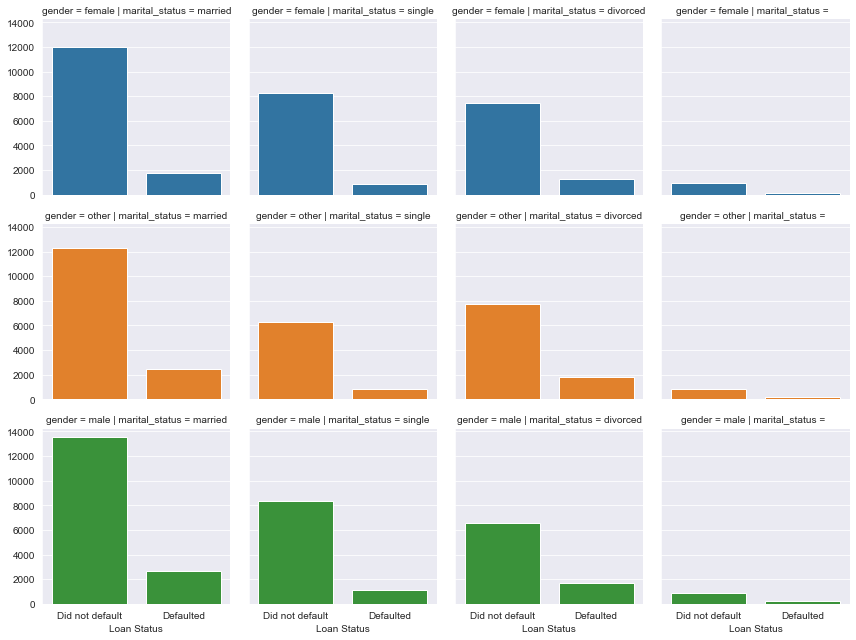

In [69]:
grid=sns.FacetGrid(textual_subset,row='gender',col='marital_status',hue='gender')
grid.map(sns.countplot,'Loan Status')

In [70]:
textual_subset['Loan Status'].value_counts()

Did not default    85134
Defaulted          14866
Name: Loan Status, dtype: int64

In [72]:
textual.query("marital_status=='married'").gender.value_counts()

male      16194
other     14726
female    13790
Name: gender, dtype: int64

## observations

- majority borrowers are indeed married men with a count of 16194

- overall loan status: `Did not default` with only 14866 that defaulted

### adding interactive visualisations

In [ ]:
import plotly.express as px